# Retificador trifásico em ponte (Carga R)

In [1]:
from funcoes import *
%run funcoes.py
%matplotlib inline

# - Tensão na carga - # 
Vpk:	 70.71067811865476 
Vm: 	 116.9545201850515 
Vrms: 	 117.05746483456389
# - Corrente na carga - # 
Ipk: 	 1.2247448713915894 
Im: 	 1.1695452018505146 
Irms: 	 1.1705746483456392
# - Potências trifásicas - # 
Ppk:	 242.40373905417 
P: 	 137.02450073495174 
S: 	 143.36552971423342
# - Fatores - # 
FP:	 0.9557701980948902 
THD V:	 0.0018850159739448947 
THD I:	 0.30811380558316254


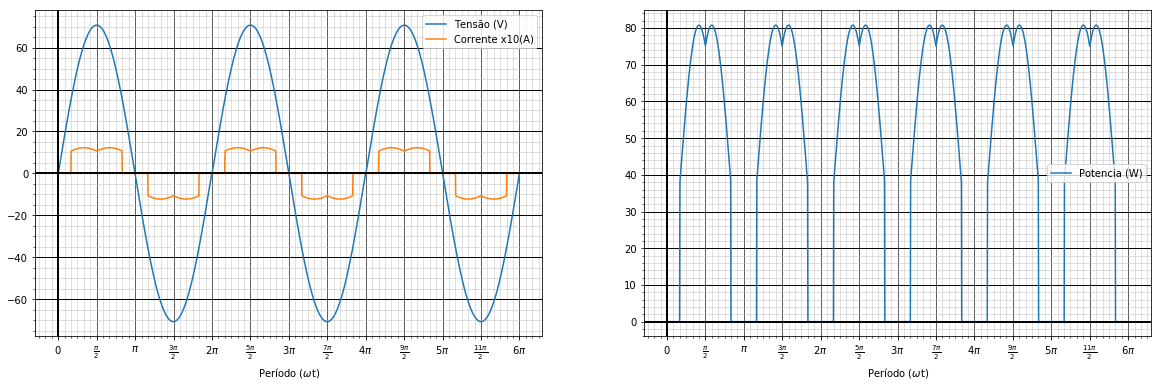

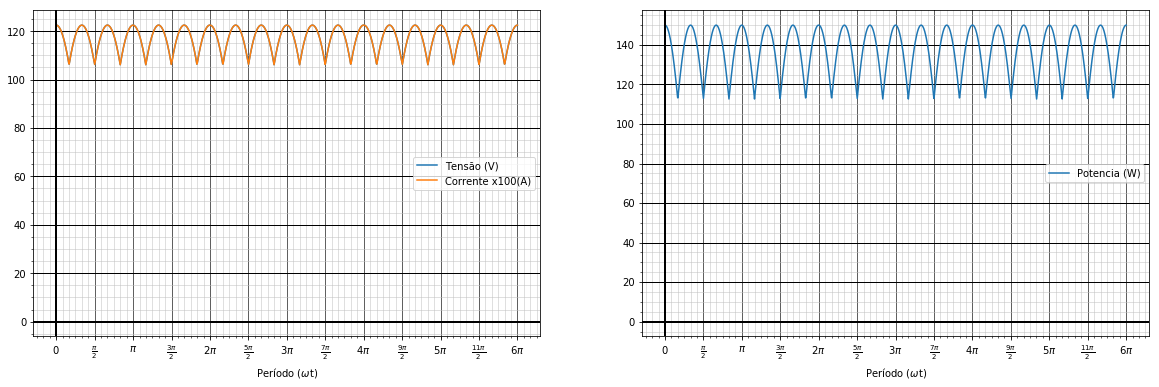

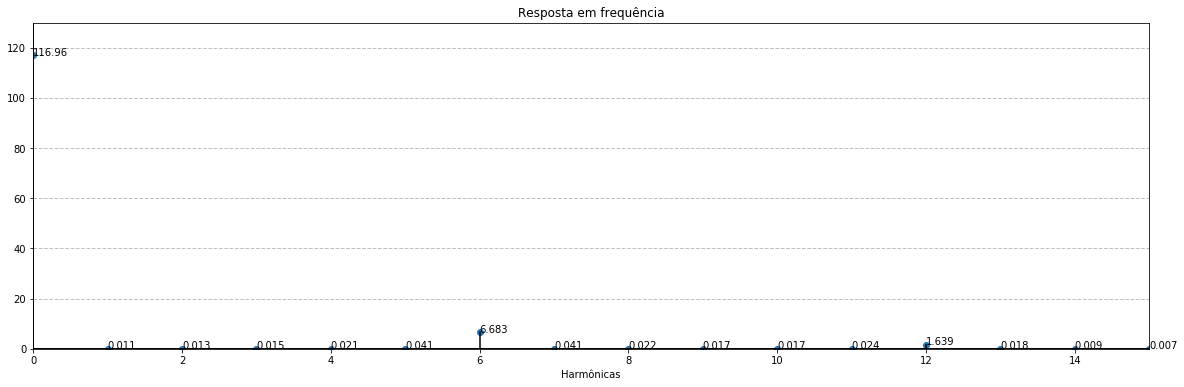

In [68]:
############# RETIFICADOR TRIFÁSICO ONDA COMPLETA #############
########################### CARGA R ###########################

V_pk = 50*sqrt(2) # tensão de pico de uma fase
R = 100
Freq = 60

T = 2*pi

w = 2*pi*Freq

# Tensões de fase
Va = f'{V_pk}*sin(x)'
Vb = f'{V_pk}*sin(x - {2*pi/3})'
Vc = f'{V_pk}*sin(x - {4*pi/3})'

# Tensões de linha
Vab = f'({Va} - {Vb})'
Vac = f'({Va} - {Vc})'
Vbc = f'({Vb} - {Vc})'
Vba = f'({Vb} - {Va})'
Vca = f'({Vc} - {Va})'
Vcb = f'({Vc} - {Vb})'

# Intervalos para degraus
# 30-90, 90-150, 150-210, 210-270, 270-330, 330-360, 0-30
# Obs: o último intervalo (330-30) está dividido em dois pois passa pelo 0

deg = [degrau(pi/6,pi/2), degrau(pi/2,5*pi/6), degrau(5*pi/6,7*pi/6), degrau(7*pi/6,3*pi/2), degrau(3*pi/2,11*pi/6), degrau(11*pi/6,2*pi), degrau(0-eps,pi/6)]

# Tensao de saída
func_vout = f'{Vab}*{deg[0]} + {Vac}*{deg[1]}'
func_vout += f'+ {Vbc}*{deg[2]} + {Vba}*{deg[3]}'
func_vout += f'+ {Vca}*{deg[4]} + {Vcb}*{deg[5]} + {Vcb}*{deg[6]})'
Vout_media = calculo_medio(func_vout)
Vout_rms = calculo_rms(func_vout)

# Corrente de saída do retificador
func_iout = f'({func_vout}/{R})'
Iout_media = calculo_medio(func_iout)
Iout_rms = calculo_rms(func_iout)
I_pk = calculo_pk(func_iout)

# Tensão de entrada de uma fase
func_vin = f'{V_pk}*sin(x)'
Vin_media = calculo_medio(func_vin)
Vin_rms = calculo_rms(func_vin)

# Corrente de entrada de uma fase
a = pi/6
b = 5*pi/6
func_iin = f'{func_iout}*({degrau(a,b)} - {degrau(a+pi,b+pi)})'
Iin_media = calculo_medio(func_iin)
Iin_rms = calculo_rms(func_iin)

# Potencia ativa e aparente da entrada (Trifásicas)
func_p = f'(3*{func_vin}*{func_iin})'
P = calculo_medio(func_p)
S = 3*Iin_rms*V_pk/sqrt(2)
P_pk = calculo_pk(func_p)

FP = P/S
thdV = calculo_thd(func_vin, T)
thdI = calculo_thd(func_iin, T)

print("# - Tensão na carga - #"   , "\nVpk:\t"  , V_pk, "\nVm: \t"  , Vout_media, "\nVrms: \t", Vout_rms)
print("# - Corrente na carga - #" , "\nIpk: \t" , I_pk, "\nIm: \t"  , Iout_media, "\nIrms: \t", Iout_rms)
print("# - Potências trifásicas - #"         , "\nPpk:\t"  , P_pk, "\nP: \t"   , P         , "\nS: \t"   , S)
print("# - Fatores - #"           , "\nFP:\t"   , FP  , "\nTHD V:\t", thdV      , "\nTHD I:\t", thdI)

plot_info(func_vin, func_iin, xlim=(0, T))
plot_info(func_vout, func_iout, xlim=(0, T))

fig, (ax2) = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
plot_fft(func_vout, ax2, T=2*np.pi, n_harmonicas = 15)

###### 